In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

###4

In [2]:
def difference_score(x_goal, x_m):
  diff = x_goal ^ x_m
  score = 0
  while diff:
    diff &= (diff - 1)
    score += 1
  return score

def sum_score(x_m):
  score = 0
  while x_m:
    x_m &= (x_m - 1)
    score += 1
  return score

def invert_bits(x, p, l): 
  x_m = x
  for bitPos in range(l):
    if random.random() < p:
      x_m ^= 1 << bitPos
  return x_m

Using the difference score method

x_m: 0b10001000100110010111101001011110011111000100011000011000001100000111110011011000001000100111111000 

Final difference score using (c):  0
Final difference score using (c'): 49 

x_m: 0b1011000000111000111000001011111101100101100000101010010100010101010010000000100100010100011111000110 

Final difference score using (c):  0
Final difference score using (c'): 40 

x_m: 0b1001010010011000000010101010110011110111011010000011110101100111110100000111110010010110101011011 

Final difference score using (c):  0
Final difference score using (c'): 53 

x_m: 0b1111001110110111100101101001100001100100001000101101000100101111010110110101101001101110000100011100 

Final difference score using (c):  0
Final difference score using (c'): 51 

x_m: 0b1010001100111101111011111101000101001000101111000110110110010100010111011000100110111010110010010 

Final difference score using (c):  0
Final difference score using (c'): 62 

x_m: 0b101100111011100101101011101110000110101111010001011010010011000111

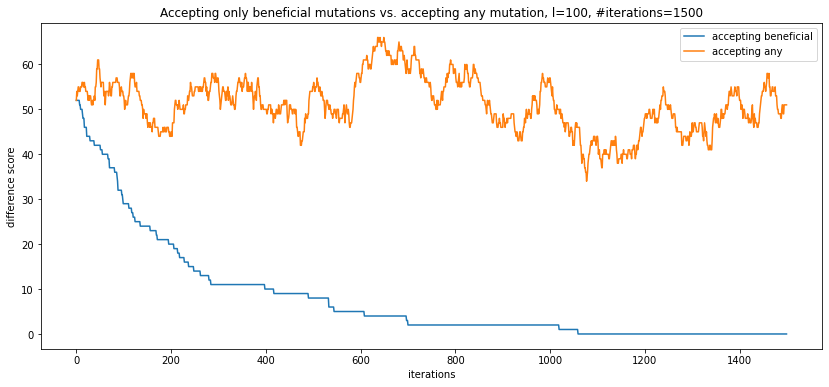

In [3]:
# b
nr_runs = 10 # set to 1 for a and c, set to 10
for run in range(nr_runs): 
  l = 100
  p = 1/l
  iterations = 1500

  x_m = 0
  x_goal = random.randint(0, 2**l - 1)
  # x_goal = 2**l - 1
  #print(f'goal: {bin(x_goal):>102}', x_goal,'\n')

  # a
  x = random.randint(0, 2**l - 1)
  x2 = x
  #print(f'x:    {bin(x):>102}', x, '\n')

  diff_score_0 = difference_score(x_goal, x)
  #print('Initial difference score: ', diff_score_0, '\n')


  fitness = np.zeros((2, iterations))  # for storing the fitness scores
  fitness[:, 0] = np.asarray([diff_score_0, diff_score_0])  # init
  for i in range(1, iterations): 
    x_m = invert_bits(x, p, l)
    # c
    if difference_score(x_goal, x) > difference_score(x_goal, x_m):       # if new sequence better
      x = x_m           # replace with new value
    # c'
    x2 = invert_bits(x2, p, l)  # "replace x with x_m"

    # record scores
    fitness[0, i] = difference_score(x_goal, x)
    fitness[1, i] = difference_score(x_goal, x2)
  print('x_m:', bin(x_m), '\n')
  print("Final difference score using (c): ", difference_score(x_goal, x))
  print("Final difference score using (c'):", difference_score(x_goal, x2), "\n")

plt.figure(figsize=(14,6))
plt.plot(fitness[0, :], label="accepting beneficial")
plt.plot(fitness[1, :], label="accepting any")
plt.legend()
plt.xlabel("iterations")
plt.ylabel("difference score")
title = f"Accepting only beneficial mutations vs. accepting any mutation, l={l}, #iterations={iterations}"
plt.title(title)
plt.show()


Using the sum score method

goal: 0b1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 1267650600228229401496703205375 

x:    0b1101110001100001011000110010000111010100010000010011100100010011100001010101111010010001100100010011 1091270977656279379875541358867 

Initial sum score: 4
x_m: 0b1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 

Final sum score using (c):  100
Final sum score using (c'): 50 



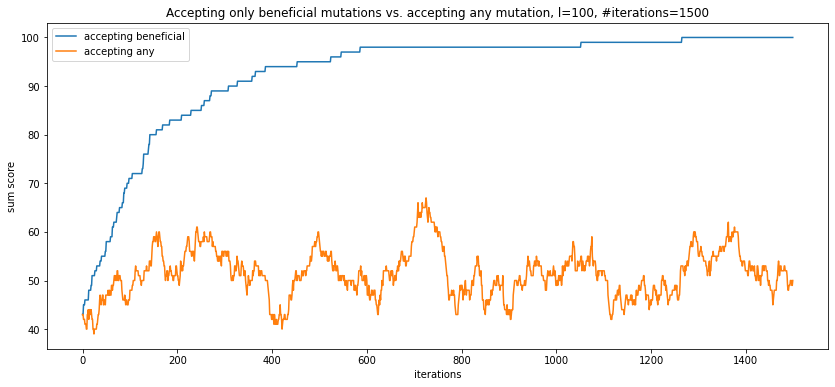

In [4]:
l = 100
p = 1/l
iterations = 1500

x_m = 0
# x_goal = random.randint(0, 2**l - 1)
x_goal = 2**l - 1  # with the sum score method, this is automatically the goal
print(f'goal: {bin(x_goal):>12}', x_goal,'\n')

# a
x = random.randint(0, 2**l - 1)
x2 = x
print(f'x:    {bin(x):>12}', x, '\n')

sum_score_0 = sum_score(x)
print('Initial sum score:', sum_score(sum_score_0))

# b
fitness = np.zeros((2, iterations))
fitness[:, 0] = np.asarray([sum_score_0, sum_score_0])
for i in range(1, iterations): 
  x_m = invert_bits(x, p, l)
  # c
  if sum_score(x_m) > sum_score(x):  # if new sequence better
    x = x_m  # replace with new value
  # c'
  x2 = invert_bits(x2, p, l)  # "replace x with x_m"

  # record scores
  fitness[0, i] = sum_score(x)
  fitness[1, i] = sum_score(x2)
print('x_m:', bin(x_m), '\n')
print("Final sum score using (c): ", sum_score(x))
print("Final sum score using (c'):", sum_score(x2), "\n")

plt.figure(figsize=(14,6))
plt.plot(fitness[0, :], label="accepting beneficial")
plt.plot(fitness[1, :], label="accepting any")
plt.legend()
plt.xlabel("iterations")
plt.ylabel("sum score")
title = f"Accepting only beneficial mutations vs. accepting any mutation, l={l}, #iterations={iterations}"
plt.title(title)
plt.show()

### 6 

1. Initialize the population randomly.
2. Determine the fitness of the chromosome.
3. Until done repeat:
    1. Select parents.
    2. Perform crossover and mutation.
    3. Calculate the fitness of the new population.
    4. Append it to the gene pool.

```
Initialize procedure GA{
    Set cooling parameter = 0;
    Evaluate population P(t);
    While( Not Done ){
        Parents(t) = Select_Parents(P(t));
        Offspring(t) = Procreate(P(t));
        p(t+1) = Select_Survivors(P(t), Offspring(t));
        t = t + 1; 
    }
}
```

Code for generating a random dummy example with 8 cities

In [5]:
# Cities to be visited
cities = ["London", "Venice", "Dunedin", "Singapore", "Beijing", "Phoenix", "Tokyo", "Victoria"]
city_locations = {}

"""
# Keep city name: 
def generate_locations(cities, city_locations):
  # Give all cities a random location
  for c in cities:
    city_locations[c] = (random.randint(0, 100), random.randint(0, 100))
"""
# Use number of city, c contains the city name: 
def generate_locations(cities, city_locations):
  # Give all cities a random location
  for nr,c in enumerate(cities):
    city_locations[nr+1] = (random.randint(0, 50), random.randint(0, 50))

# Calculate distance between two cities
def dist(a, b):
    d = [a[0] - b[0], a[1] - b[1]]
    return sqrt(d[0] * d[0] + d[1] * d[1]) 

generate_locations(cities, city_locations)

# Distance matrix
distance_matrix = {}

# Generate the distance between the cities and save in distance_matrix
for city1, loc1 in city_locations.items():
    distance_matrix[city1] = {}
    for city2, loc2 in city_locations.items():
        distance_matrix[city1][city2] = dist(loc1, loc2) 

print(distance_matrix)


{1: {1: 0.0, 2: 25.019992006393608, 3: 48.16637831516918, 4: 27.0, 5: 32.202484376209235, 6: 30.886890422961002, 7: 18.439088914585774, 8: 26.832815729997478}, 2: {1: 25.019992006393608, 2: 0.0, 3: 51.478150704935004, 4: 36.069377593742864, 5: 13.601470508735444, 6: 27.85677655436824, 7: 18.384776310850235, 8: 43.56604182158393}, 3: {1: 48.16637831516918, 2: 51.478150704935004, 3: 0.0, 4: 21.37755832643195, 5: 42.20189569201838, 6: 23.706539182259394, 7: 34.92849839314596, 8: 28.844410203711913}, 4: {1: 27.0, 2: 36.069377593742864, 3: 21.37755832643195, 4: 0.0, 5: 31.78049716414141, 6: 15.0, 7: 17.69180601295413, 8: 12.36931687685298}, 5: {1: 32.202484376209235, 2: 13.601470508735444, 3: 42.20189569201838, 4: 31.78049716414141, 5: 0.0, 6: 19.1049731745428, 7: 17.0, 8: 42.20189569201838}, 6: {1: 30.886890422961002, 2: 27.85677655436824, 3: 23.706539182259394, 4: 15.0, 5: 19.1049731745428, 6: 0.0, 7: 13.341664064126334, 8: 27.16615541441225}, 7: {1: 18.439088914585774, 2: 18.384776310850

Functions for generating a random solution and for calculating fitness


In [6]:
# Initialize the solution array (can be used to make the first parents)
def generate_solution_array(length = len(cities)):
  solution_array = []
  for c in range(length):
    solution_array.append(c+1)
  random.shuffle(solution_array)
  return solution_array


# Calculate the fitness (total distance traveled) of the solution array
#def fitness(solution_array, distance_matrix):
#  fitness_score = 0
#  for c in range(len(solution_array)-1):
#    print(solution_array)
#    print(solution_array[c])
#    print(solution_array[c+1])
#    fitness_score += distance_matrix[solution_array[c-1]][solution_array[c]]
#  return fitness_score

def fitness(s,d):
  tot= 0
  for i in range(len(s)-1):
    tot += d[s[i]-1][s[i+1]-1]
  return tot



Implementation of crossover and mutation


In [7]:

# Based on slide 63 of slideset week 1
def crossover(parent1, parent2):

  #choose 2 cutpoints
  positions = len(parent1)
  cutpoints = np.random.choice(positions, 2, replace=False)
  cutpoint1 = np.min(cutpoints)
  cutpoint2 = np.max(cutpoints)
  #cutpoint1 = 2 (fixed for testing)
  #cutpoint2 = 4
  
  #copy between cutpoints to offspring
  child1 = [0] * len(parent1)
  child2 = [0] * len(parent1)
  for ind in range(cutpoint1, cutpoint2+1):
    child1[ind] = parent2[ind]
    child2[ind] = parent1[ind]

  #fill in the rest 
  j1 = (cutpoint2+1)%positions
  j2 = (cutpoint2+1)%positions
  for i in range(cutpoint2+1, cutpoint2 + positions+1):
    k = i%positions
    if (parent1[k] not in parent2[cutpoint1:(cutpoint2+1)]):
      child1[j1] = parent1[k]
      j1 = (j1 + 1)%positions
    if (parent2[k] not in parent1[cutpoint1:(cutpoint2+1)]):
      child2[j2] = parent2[k]
      j2 = (j2 + 1)%positions
   
  return child1, child2


# I currently only use one parent for the mutation but it seems like this is also done in the slide
# Reverse sequence mutation (swap two values at random index)
def mutation(solution_array):
  index = random.sample(range(0, len(solution_array)-1), 2)
  solution_array[index[0]], solution_array[index[1]] = solution_array[index[1]], solution_array[index[0]]
  return solution_array

Below is the code for the simple evolutionary algorithm solution to the TSP. 

In [8]:
#simple Evolutionary strategy
def simple_SEA( nr_cities, distance_array, nr_g):
#initialize population
  size_pop = 20
  population = []
  children = []
  nr_generations = nr_g
  pc= 1.0 #probability crossover
  pm = 0.001 #probability mutation
  best_fit_SEA = []
  for mu in range(size_pop):
    population.append(generate_solution_array(nr_cities))

  #simulate evolution
  for gen in range(nr_generations):
    #select random pairs
    pairs = paired_pop = np.random.choice(size_pop,(int(size_pop/2), 2), replace=False)
    #cross over
    for pair in pairs:
      prob_cross  = np.random.uniform(0.0,1.0)
      if prob_cross <= pc:
        c1,c2 = crossover(population[pair[0]],population[pair[1]])
      else:
        c1 = generate_solution_array()
        c2 = generate_solution_array()
      children.append(c1)
      children.append(c2)

    #mutations
    for nr, child in enumerate(children):
      prob_mutate = np.random.uniform(0.0,1.0)
      if prob_mutate < pm:
        children[nr] = mutation(child)

    #calculate fitness 
    population.extend(children)
    fit_list = list(map(lambda x: fitness(x,distance_array), population))
    lowest = min(fit_list)
    fit_list = list(map(lambda x: x - (lowest-1), fit_list))
  
    sum_fit = sum(list(map(lambda x: 1/x, fit_list)))

    #caculate selection probabilities 
    # note that we want to minimize the distance, so everything is 1/x
    selection_prob =list(map(lambda x: ((1/x)/sum_fit), fit_list))

    #select new generaton

    kept = np.random.choice(len(population),size = size_pop, replace=False,p =selection_prob ) 

    popp =[population[h] for h in kept]
    
    
    children.clear()
    best_fit_SEA.append(lowest)
    population = list(popp)
  return best_fit_SEA

Below is the adjusted version of the EA using local search
in the form of 2-opt
code inspired by a tutuorial(http://pedrohfsd.com/2017/08/09/2opt-part1.html) and by wikipedia (https://en.wikipedia.org/wiki/2-opt)


In [9]:
def two_opt(path, distance_array):
     best_path = path
     best_fitness = fitness(best_path, distance_array)
     improved = True
     while improved:
          improved = False
          for i in range(1, len(path)-2):
               for j in range(i+1, len(path)):
                    if j-i == 1:
                       continue # changes nothing, skip then
                    else:
                      canididate_path = two_opt_swap(best_path,j,i) 
                      candidate_fitness = fitness(canididate_path, distance_array)
                      if (candidate_fitness < best_fitness):
                        #print(candidate_fitness < best_fitness)
                        best_path = canididate_path
                        best_fitness = candidate_fitness
                        improved = True
     return best_path


In [10]:
def two_opt_swap(path, j, i):
  copy = path[:]
  a =  copy[j-1:i-1:-1]
  copy[i:j] = a
  return copy

In [11]:
def local_search(population, d):
  for ind, path in enumerate(population):
    population[ind] = two_opt(path,d)

In [12]:
#memetic algorithm 

def ME(nr_cities, distance_array, nr_g):
  #initialize population
  size_pop = 20
  population = []
  children = []
  nr_generations = nr_g
  pc= 1.0 #probability crossover
  pm = 0.001 #probability mutation
  best_fit_MA = []

  for mu in range(size_pop):
    population.append(generate_solution_array(nr_cities))
  local_search(population,distance_array)

  #simulate evolution
  for gen in range(nr_generations):
    #select random pairs
    pairs = paired_pop = np.random.choice(size_pop,(int(size_pop/2), 2), replace=False)
    #cross over
    for pair in pairs:
      prob_cross  = np.random.uniform(0.0,1.0)
      if prob_cross <= pc:
        c1,c2 = crossover(population[pair[0]],population[pair[1]])
      else:
        c1 = generate_solution_array()
        c2 = generate_solution_array()
      children.append(c1)
      children.append(c2)

    #mutations
    for nr, child in enumerate(children):
      prob_mutate = np.random.uniform(0.0,1.0)
      if prob_mutate < pm:
        children[nr] = mutation(child)

    local_search(children,distance_array)
    #calculate fitness 
    population.extend(children)
    fit = fitness(population[0], distance_array)
    fit_list = list(map(lambda x: fitness(x,distance_array), population))
    lowest = min(fit_list)
    fit_list = list(map(lambda x: x - (lowest-1), fit_list))
  
    sum_fit = sum(list(map(lambda x: 1/x, fit_list)))

    #caculate selection probabilities 
    # note that we want to minimize the distance, so everything is 1/x
    selection_prob =list(map(lambda x: ((1/x)/sum_fit), fit_list))

    #select new generaton

    kept = np.random.choice(len(population),size = size_pop, replace=False,p =selection_prob ) 

    popp =[population[h] for h in kept]
    
    
    children.clear()
    best_fit_MA.append(lowest)
    population = list(popp)
  return best_fit_MA


In [13]:
#import data
import pandas as pd
list_file = []
with open('/content/file-tsp.txt', 'r') as f:
    content = f.readlines()
    for x in content:
        row = x.split()
        row  = [float (row[0]),float(row[1])]
        list_file.append(row)

print(list_file[0])
distance_matrix_file =  [[dist(list_file[j],list_file[i]) for i in range(len(list_file))] for j in range(len(list_file))]




FileNotFoundError: [Errno 2] No such file or directory: '/content/file-tsp.txt'

In [ ]:
list_bays29 = []
with open('/content/bays29-tsp.txt', 'r') as f:
    content = f.readlines()
    for x in content:
        row = x.split()
        row  = [float (row[0]),float(row[1])]
        list_bays29.append(row)

distance_matrix_bays29 = [[dist(list_bays29[j],list_file[i]) for i in range(len(list_bays29))] for j in range(len(list_bays29))]



In [ ]:
#calculate the best fit over the generations for the file provided in the assignment
best_file_ME = ME(len(list_file),distance_matrix_file, 1500)
best_file_SEA = simple_SEA(len(list_file),distance_matrix_file, 1500)

#calculate the best fit over the generations for the cities in Bavaria dataset bays29
#from the file, only the distances were included.
best_bays29_ME = ME(len(list_bays29),distance_matrix_bays29,1500)
best_bays29_SEA = simple_SEA(len(list_bays29),distance_matrix_bays29, 1500)

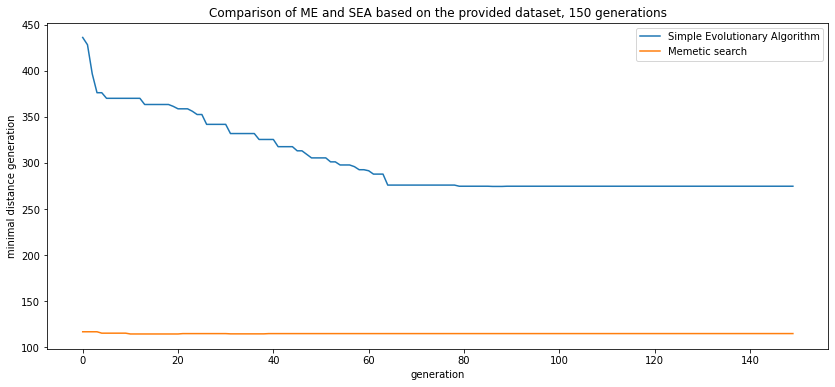

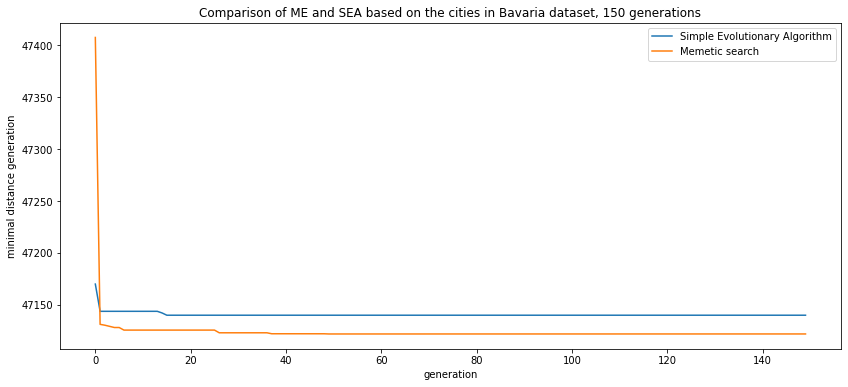

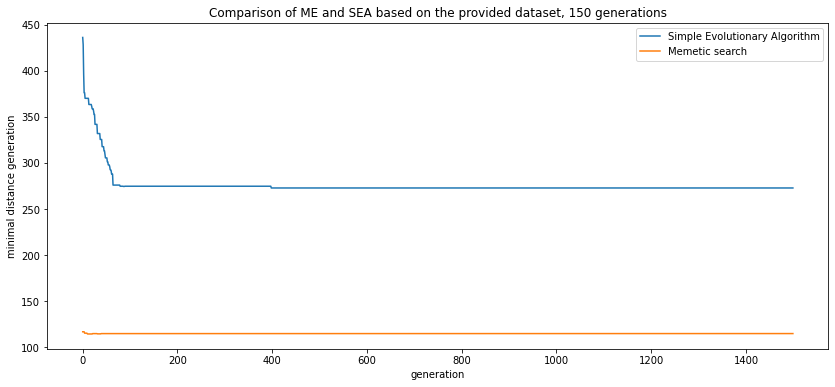

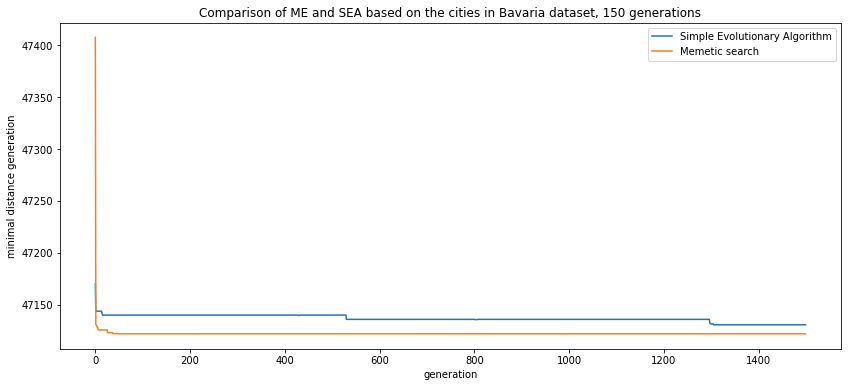

In [ ]:

plt.figure(figsize=(14,6))
plt.plot(best_file_SEA[:150], label="Simple Evolutionary Algorithm")
plt.plot(best_file_ME[:150], label="Memetic search")
plt.legend()
plt.xlabel("generation")
plt.ylabel("minimal distance generation")
plt.title("Comparison of ME and SEA based on the provided dataset, 150 generations")
plt.show()

plt.figure(figsize=(14,6))
plt.plot(best_bays29_SEA[:150], label="Simple Evolutionary Algorithm")
plt.plot(best_bays29_ME[:150], label="Memetic search")
plt.legend()
plt.xlabel("generation")
plt.ylabel("minimal distance generation")
plt.title("Comparison of ME and SEA based on the cities in Bavaria dataset, 150 generations")
plt.show()

plt.figure(figsize=(14,6))
plt.plot(best_file_SEA, label="Simple Evolutionary Algorithm")
plt.plot(best_file_ME, label="Memetic search")
plt.legend()
plt.xlabel("generation")
plt.ylabel("minimal distance generation")
plt.title("Comparison of ME and SEA based on the provided dataset, 150 generations")
plt.show()

plt.figure(figsize=(14,6))
plt.plot(best_bays29_SEA, label="Simple Evolutionary Algorithm")
plt.plot(best_bays29_ME, label="Memetic search")
plt.legend()
plt.xlabel("generation")
plt.ylabel("minimal distance generation")
plt.title("Comparison of ME and SEA based on the cities in Bavaria dataset, 150 generations")
plt.show()

### 8

In [242]:
#DEAP FRAMEWORK 
!pip install deap
import deap
import math
import pandas as pd
import operator
import traceback
import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

def protectedLog(val):
    try:
        return math.log(val)
    except:
        return 1

def protectedExp(val):
    try:
        return math.exp(val)
    except:
        return 10

def feasible(individual):
    """Feasibility function for the individual. Returns True if feasible False
    otherwise."""
    func = toolbox.compile(expr=individual)
    for _, x in enumerate(data[:,0]):
        if np.isnan(func(x)):
            return False
    return True

def evalFunc(individual, points):
    func = toolbox.compile(expr=individual)
    data = np.asarray(pd.read_csv("file-pygp.csv"))
    errors = []
    
    for i, _ in enumerate(points):
        try:
            errors.append(np.abs(func(data[i, 0]) - data[i, 1]))
        except:
            return 10, 
        #     print("f(x) =", individual)
        #     print(f"x = {data[i, 0]}")
        #     print(f"expected output = {data[i, 1]}")
        #     traceback.print_exc()
        #     raise ValueError
        # except OverflowError:
        #    print("f(x) =", individual)
        #    print(f"x = {data[i, 0]}")
        #    print(f"expected output = {data[i, 1]}")
        #    print(f"abs.error = {np.abs(func(data[i, 0]) - data[i, 1])}")
        #    traceback.print_exc()
        #    raise OverflowError
    return math.fsum(errors) / len(points),  # must return a tuple, this explains the comma at the end


pset = gp.PrimitiveSet("main", 1)  # 1 for one input (the terminal 'x')
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(math.sin, 1)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(protectedLog, 1)
pset.addPrimitive(protectedExp, 1)
pset.renameArguments(ARG0="x")

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin,
               pset=pset)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

data = np.asarray(pd.read_csv("file-pygp.csv"))
toolbox.register("evaluate", evalFunc, points=[x/10. for x in range(-10,10)])
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, 7.0))
toolbox.register("select", tools.selTournament, tournsize=10)
# algorithms.eaSimple below allows to set mate prob., mutation prob. and no. of generations
toolbox.register("mate", gp.cxOnePoint)  # one point crossover with uniform probability over all the nodes
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=10))  # limit the height of generated individuals

#toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
#toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
#toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=10))



You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [229]:
# setup statistics
stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", np.mean)
mstats.register("std", np.std)
mstats.register("min", np.min)
mstats.register("max", np.max)

In [230]:
def plot_logbook(logbook):
    gen = logbook.select("gen")
    select_fitness = "min"
    fit_mins = logbook.chapters["fitness"].select(select_fitness)
    size_avgs = logbook.chapters["size"].select("avg")
    size_max = logbook.chapters["size"].select("max")
    size_min = logbook.chapters["size"].select("min")

    import matplotlib.pyplot as plt

    fig, ax1 = plt.subplots()
    lbl = f"{select_fitness} Fitness"
    line1 = ax1.plot(gen, fit_mins, "b-", label=lbl)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness", color="b")
    for tl in ax1.get_yticklabels():
        tl.set_color("b")

    ax2 = ax1.twinx()
    lbl = f"{select_size} Size"
    # line2 = ax2.plot(gen, size_avgs, "r-", label="Avg Size")
    # line2 = ax2.plot(gen, size_max, "y-", label="Max Size")
    line2 = ax2.plot(gen, size_min, "g-", label="Min Size")
    ax2.set_ylabel("Size", color="r")
    for tl in ax2.get_yticklabels():
        tl.set_color("r")

    lns = line1 + line2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc="center right")

    plt.show()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/core/_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
   	      	                      fitness                      	                      size                     
   	      	---------------------------------------------------	-----------------------------------------------
gen	nevals	avg	gen	max	min     	nevals	std	avg  	gen	max	min	nevals	std    
0  	1000  	inf	0  	inf	0.193955	1000  	nan	3.649	0  	7  	2  	1000  	1.53877
1  	744   	0.706912	1  	7  	0.193955	744   	0.528941	3.28 	1  	9  	2  	744   	1.4858 
2  	698   	0.712007	2  	7  	0.193955	698   	0.90455 	4.711	2  	10 	2  	698   	1.7

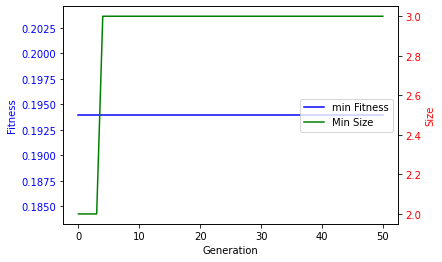

In [238]:
# launch evolution
pop = toolbox.population(n=1000)
hof = tools.HallOfFame(1)
# algorithms.eaSimple allows to set mate prob., mutation prob. and no. of generations
pop, logbookSimple = algorithms.eaSimple(pop, toolbox, 0.7, 0.0, 50, stats=mstats, halloffame=hof, verbose=True)
plot_logbook(logbookSimple)

In [243]:
# Mu Plus Lambda algorithm G(mu+lambda)
# launch evolution
pop_size = 1000
mu = 50
lambda_ = pop_size - mu
ngen = 50  # number of generations
cxpb = 0.7  # crossover probability
mutpb = 0.0  # mutation probability
pop = toolbox.population(n=pop_size)
hof = tools.HallOfFame(1)
# algorithms.eaSimple allows to set mate prob., mutation prob. and no. of generations
pop, logbookPlus = algorithms.eaMuPlusLambda(pop, toolbox, mu, lambda_, cxpb, mutpb, ngen, stats=mstats, halloffame=hof, verbose=True)
plot_logbook(logbookPlus)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
   	      	                      fitness                      	                      size                     
   	      	---------------------------------------------------	-----------------------------------------------
gen	nevals	avg	gen	max	min     	nevals	std	avg  	gen	max	min	nevals	std    
0  	1000  	inf	0  	inf	0.193955	1000  	nan	3.598	0  	7  	2  	1000  	1.50546


ValueError: math domain error

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=48486dc9-a1a6-4dac-ab77-4156e0b947fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>